In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 13,
                    'axes.labelsize': 16, 'legend.fontsize': 16,
                    'xtick.labelsize': 15, 'ytick.labelsize': 15})
                    
#N = 300
#x1 = np.random.normal(1.5, 0.5,N)
#y1 =  np.random.normal(2,0.2, N)
# df=pd.DataFrame({'x':x1,'y':y1})

tips = sns.load_dataset("tips")
df = pd.DataFrame({'x': tips['total_bill'], 'y': tips['tip']})
df


,x,y
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


## (a) 二维散点与统计直方图

C:\QMDownload\anaconda\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


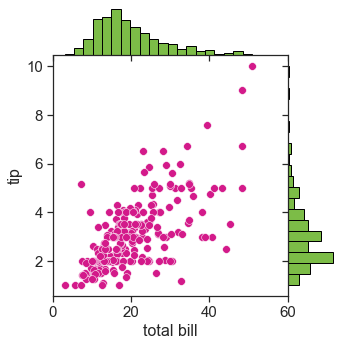

In [2]:
sns_hist = sns.jointplot(x='x', y='y',  # 设置xy轴，显示columns名称
                         data=df,   # 设置数据
                         color='#D31A8A',   # 设置颜色
                         s=60, edgecolor="w", linewidth=0.5,
                         # 设置散点大小、边缘线颜色及宽度(只针对scatter）
                         kind='scatter',  # kind="kde","hex","reg"
                         space=0,  # 设置散点图和布局图的间距
                         size=5, ratio=5,  # 散点图与布局图高度比，整型
                         xlim=(0, 60),
                         marginal_kws=dict(bins=20, rug=False,
                                           hist_kws={'edgecolor': 'k',
                                                     'color': '#7CBC47',
                                                     'alpha': 1})  # 设置柱状图箱数，是否设置rug
                         )

sns_hist.set_axis_labels(xlabel='total bill', ylabel='tip')

# sns_hist.savefig('scatter_hist.pdf')


## (b) 带趋势线的二维散点与统计直方图

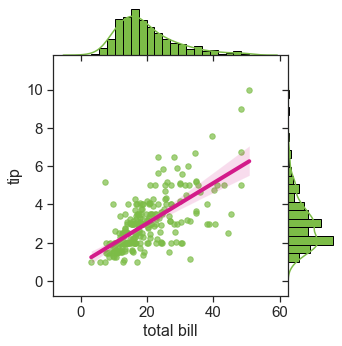

In [3]:
sns_reg = sns.jointplot(x='x', y='y',  # 设置xy轴，显示columns名称
                        data=df,   # 设置数据
                        color='#7CBC47',   # 设置颜色
                        # 设置散点大小、边缘线颜色及宽度(只针对scatter）
                        kind='reg',  # kind="kde","hex","reg"
                        space=0,  # 设置散点图和布局图的间距
                        size=5, ratio=5,  # 散点图与布局图高度比，整型
                        scatter_kws={"color": "#7CBC47",
                                     "alpha": 0.7, "s": 30, 'marker': "+"},
                        line_kws={"color": "#D31A8A", "alpha": 1, "lw": 4},
                        marginal_kws=dict(bins=20, rug=False,
                                          hist_kws={'edgecolor': 'k',
                                                    'color': '#7CBC47',
                                                    'alpha': 1})  # 设置柱状图箱数，是否设置rug
                        )
sns_reg.set_axis_labels(xlabel='total bill', ylabel='tip')
# sns_reg.savefig('scatter_reg.pdf')


## (c) 二维与一维统计直方图

C:\QMDownload\anaconda\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


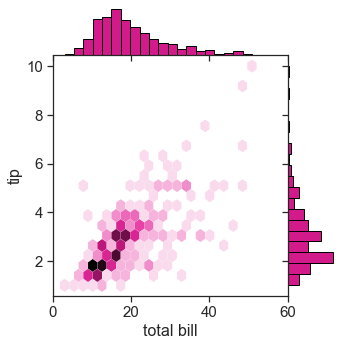

In [4]:
sns_hex = sns.jointplot(x='x', y='y',  # 设置xy轴，显示columns名称
                        data=df,   # 设置数据
                        # 设置散点大小、边缘线颜色及宽度(只针对scatter）
                        kind='hex',  # kind="kde","hex","reg"
                        color='#D31A8A', linewidth=0.1,
                        space=0,  # 设置散点图和布局图的间距
                        size=5, ratio=5,  # 散点图与布局图高度比，整型
                        xlim=(0, 60),
                        joint_kws=dict(gridsize=20, edgecolor='w'),  # 主图参数设置
                        marginal_kws=dict(bins=20, color='#D31A8A',
                                          hist_kws={'edgecolor': 'k', 'alpha': 1}),   # 边缘图设置
                        )  # 修改统计注释
sns_hex.set_axis_labels(xlabel='total bill', ylabel='tip')
# sns_hex.savefig('sns_hex.pdf')


## (d) 二维与一维核密度估计图

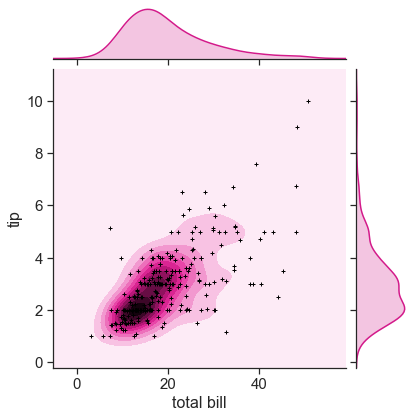

In [5]:
sns_kde = sns.jointplot(x="x", y="y", data=df, kind="kde", color='#D31A8A')
sns_kde.plot_joint(plt.scatter, c="k", s=10, linewidth=1, marker="+")
sns_kde.set_axis_labels(xlabel='total bill', ylabel='tip')
# sns_kde.savefig('sns_kde.pdf')


## (e)二维散点与一维核密度估计图

C:\QMDownload\anaconda\lib\site-packages\seaborn\axisgrid.py:1665: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
C:\QMDownload\anaconda\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
C:\QMDownload\anaconda\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.


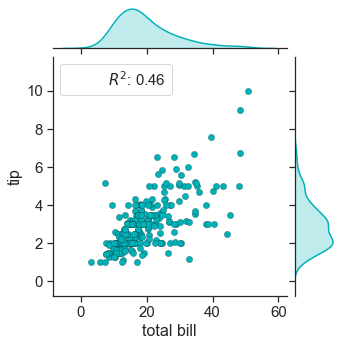

In [6]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips, size=5, ratio=5)
g = g.plot_joint(plt.scatter,
                 color="#00B1B8", s=40, edgecolor="black", linewidth=0.2)
g = g.plot_marginals(sns.kdeplot, shade=True, color="#00B1B8")
g = g.annotate(stats.pearsonr, loc="upper left", fontsize=12)
def rsquare(a, b): return stats.pearsonr(a, b)[0] ** 2

g = g.annotate(rsquare, template="{stat}: {val:.2f}",
               stat="$R^2$", loc="upper left", fontsize=15)
g.set_axis_labels(xlabel='total bill', ylabel='tip')
# g.savefig('sns_kde_scatter.pdf')
